In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [59]:
from tqdm import tqdm
from glob import glob
import os, sys
import numpy as np
from configs import *
from utils import *
import matplotlib.pyplot as plt

In [60]:
sfiles = glob('%s/%s/**/*.csv' % (DPATH, SPEEDS))
print(len(sfiles))

16728


In [62]:
segments = []
for sfile in tqdm(sfiles):
    sname = fileName(sfile)
    hist = get_hist(sname)
    assert hist is not None
    segments.append(dict(name=sname, hist=hist))

 21%|██▏       | 3561/16728 [09:41<35:48,  6.13it/s]

KeyboardInterrupt: 

In [51]:
valid_lookup = {}
with open('data/valid_counts.txt') as fl:
    lines = fl.read().split('\n')[1:-1]
for ln in lines:
    sid, count = ln.split(',')
    valid_lookup[sid] = int(count)/13248

In [52]:
routes = []
for route in tqdm(all_routes):
    stops = route['stops']
    vals = []
    for si in range(len(stops) - 1):
        sk = segkey(stops[si], stops[si+1])
        if sk not in valid_lookup:
            val = None; break
        val = valid_lookup[sk]
        vals.append(val)
    if val is not None: # didn't break out of missing segment
        route['validity'] = vals
        routes.append(route)

100%|██████████| 651/651 [00:00<00:00, 11775.96it/s]


In [53]:
print(len(routes), len(all_routes))
print(routes[0]['validity'][:10])

496 651
[0.6726298309178744, 0.7915157004830918, 0.7918176328502415, 0.8102355072463768, 0.6005434782608695, 0.6968599033816425, 0.8280495169082126, 0.8214070048309179, 0.7490187198067633, 0.6238677536231884]


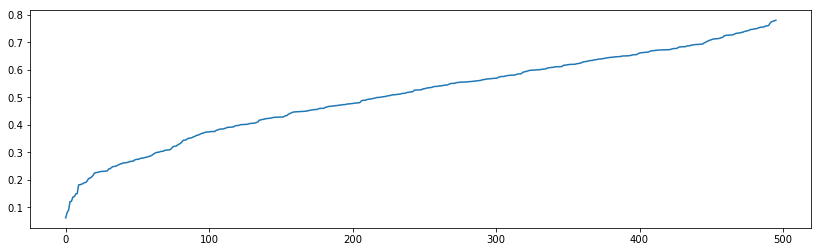

In [54]:
vals = [np.mean(rt['validity']) for rt in routes]
plt.figure(figsize=(14, 4))
plt.plot(sorted(vals))
plt.show(); plt.close()

In [56]:
low_val = list(filter(lambda rt: np.mean(rt['validity']) < 0.5, routes))
print(len(low_val))

219


In [57]:
print(low_val[0]['name'])

S55_1


In [2]:
from dataset import *

In [4]:
dset = Routes('train', 32, index_file='min-data.json')

Routes dataset: train
 [*] Loaded routes: 224 (0.24s)
 [*] Subset train: 204 (reserved_routes.json)
 [*] Loaded trainable inds: 240935 (0.21s)


In [13]:
traindata = [ent for ent in dset.meta]
print(len(traindata))
byinteg = sorted(traindata, key=lambda ent: 1-ent['integ'])
# print(byinteg[0]['integ'])
for ent in byinteg[:10]:
    print(ent['name'], len(ent['trainable']), ent['integ'])

204
M102_0 3480 0.8779515168263325
Bx15_0 2432 0.8685342288205491
M60-SBS_0 592 0.8661517042404724
M86-SBS_0 339 0.8515247584541062
Q5_0 3373 0.8508801328502416
B15_0 4306 0.8406602934456195
Q58_0 4245 0.8360467518433765
Q27_0 5262 0.8320593011489751
B41_0 3513 0.8299463790481303
B46_0 3892 0.8277238213455
